## Exam project

First we import all used packages throughout the project

In [1]:
# packagaes 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize
import scipy as sp
from scipy import linalg
from scipy import optimize
from scipy import interpolate
import sympy as sm
%matplotlib inline
plt.style.use('seaborn-whitegrid')
from matplotlib import cm

<h1> Problem 1 - Linear Regression</h1>

Consider the following **linear equation:**

$$y_i = \beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i} + \epsilon_i$$

Assume you have access to data of the **independent variables** ($x_{1,i}$, $x_{2,i}$) and the **dependent variable** ($y_i$) for $N$ individuals, where $i$ indexes individuals. The variable $\epsilon_i$ is a mean-zero **stochastic shock**.

And import given code block from the exam description: 

In [2]:
def DGP(N):
    
    # a. independent variables
    x1 = np.random.normal(0,1,size=N)
    x2 = np.random.normal(0,1,size=N)
    
    # b. errors
    eps = np.random.normal(0,1,size=N)
    
    extreme = np.random.uniform(0,1,size=N)
    eps[extreme < 0.05] += np.random.normal(-5,1,size=N)[extreme < 0.05]
    eps[extreme > 0.95] += np.random.normal(5,1,size=N)[extreme > 0.95]
    
    # c. dependent variable
    y = 0.1 + 0.3*x1 + 0.5*x2 + eps
    
    return x1, x2, y

In [3]:
np.random.seed(2020)
x1,x2,y = DGP(10000)

<h2> Question 1 </h2> 

Estimate the vector of coefficients $\mathbf{\beta} = (\beta_0,\beta_1,\beta_2)$ using **ordinary least squares (OLS)** implemented with **matrix algebra** by

$$ \hat{\mathbf{\beta}} = (\mathbf{X}^{\prime}\mathbf{X})^{-1}\mathbf{X}^{\prime}\mathbf{y} $$

where $\mathbf{X}^{\prime}$ is the transpose of $\mathbf{X}$ and

$$\mathbf{y} = 
\pmatrix{ y_1 \cr y_2 \cr  \vdots \cr y_N 
}
, \quad \mathbf{X} = \pmatrix{
1 & x_{1,1} & x_{2,1} \cr 
1 & x_{1,2} & x_{2,2} \cr 
\vdots & \vdots \cr 
1 & x_{1,N} & x_{2,N} 
}
$$

To estimate the vector of the coefficients $\beta$ = ($\beta_0$,$\beta_1$,$\beta_2$) we firstly calculate X transpose (X'), then the inverse product of X' and X, which is multiplied with X' and Y.
First, we define the X matrix as a dataframe. 


In [4]:
x0 = 1
X = pd.DataFrame({'x0':x0,'x1':x1,'x2':x2}) # X matrix

Beta can now be found: 

In [5]:
X_trans = X.T # transposing X 
X_trans_X = X_trans.dot(X) # multiplying the transposed X with X
Inv_X_X_trans = np.linalg.inv(X_trans_X) # inverting the product of transposed X multiplied with X
X_trans_y = X_trans.dot(y) # multiplying X transposed with y. Y is given above. 

beta_hat = Inv_X_X_trans.dot(X_trans_y) # find beta 

betas = pd.DataFrame({'Beta 0':beta_hat[:1],'Beta 1':beta_hat[1:2],'Beta 2':beta_hat[2:]}) # included for presentation purposes of betas
betas

,Beta 0,Beta 1,Beta 2
0,0.095682,0.292943,0.503328


<h2> Question 2 </h2>

To construct a 3D plot we firstly calculate the values of $y_i$, as a function of the $x$ values and its corresponding beta values calculated in quesiton 1:

$$
\hat y_i = \hat \beta_0 + \hat \beta_1 x_1,_i + \hat \beta_2 x_2,_i
$$

We then combine then combine all values for $x_1$, $x_2$ & $y$ in a data frame. Finally we plot the 3D Graph

In [6]:
y_hat = np.dot(X,beta_hat) # calculating possible y's
df_y_hat = pd.DataFrame({'x1':x1,'x2':x2,'y_hat':y_hat})

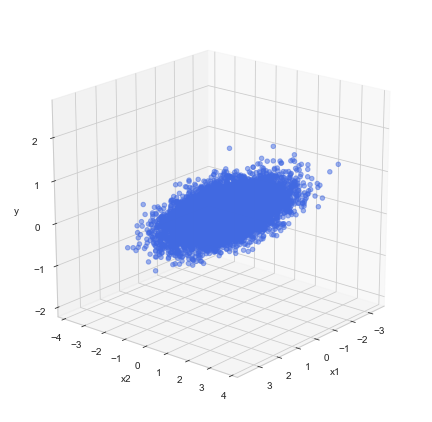

In [7]:
# Plotting values of y with x1 and x2 in a three dimensional scatter plot
fig = plt.figure(figsize=(7.5, 7.5))
ax = fig.gca(projection='3d')
ax.scatter(df_y_hat['x1'],df_y_hat['x2'],df_y_hat['y_hat'], c='royalblue',alpha=.5)
ax.set(xlabel='x1',ylabel='x2',zlabel='y')
for angle in range(0,360):
    ax.view_init(20,40)
    plt.show()


<h2> Question 3 </h2>

To estimate the vector of the coefficients $\beta$ = ($\beta_0$,$\beta_1$,$\beta_2$) using a numerical solver, we create empty values for $\beta_0$,$\beta_1$ & $\beta_2$, then define the three values of $\beta$ and make it return the formula:

$$
\underset{\beta}{\textit{min}} \hspace2mm \sum^N_{i=1} (y_i - (\beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i}))^2
$$

We make initial guess for the $\beta$ values and minimize the formula to get the $\beta$ values.


In [8]:
# empty betas
b0 = np.empty(1)
b1 = np.empty(1)
b2 = np.empty(1)

def function(x, b0, b1, b2): # defining function for minimization

    b0 = x[0]
    b1 = x[1]
    b2 = x[2]

    return np.sum((y - (b0 + b1*x1 + b2*x2))**2)


#initial guess
b = np.array([0.2, 1.5, 9.5])

estimate = minimize(function, b, args=(b0,b1,b2), method='SLSQP')

b0 = estimate.x[0]
b1 = estimate.x[1]
b2 = estimate.x[2]

print("Solving with OLS implies following beta coefficients: "+"{:.5f}".format(b0)+" for beta 0, "+"{:.5f}".format(b1)+" for beta 1 and "+"{:.5f}".format(b2)+" for beta 2")

Solving with OLS implies following beta coefficients: 0.09568 for beta 0, 0.29294 for beta 1 and 0.50333 for beta 2


<h2> Question 4 </h2>

To estimate the vector of the coefficients $\beta$ = ($\beta_0$,$\beta_1$,$\beta_2$) using least absolute deviations (LAD), we create empty values for $\beta_0$,$\beta_1$ & $\beta_2$, then define the three values of $\beta$ and make it return the formula:


$$
\underset{\beta}{\textit{min}} \hspace2mm \sum^N_{i=1}| y_i - (\beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i})|
$$

We make initial guess for the $\beta$ values and minimize the formula to get the $\beta$ values.


In [9]:
# empty betas
b0 = np.empty(1)
b1 = np.empty(1)
b2 = np.empty(1)

def function(x, b0, b1, b2):# defining function for minimization

    b0 = x[0]
    b1 = x[1]
    b2 = x[2]

    return np.sum(np.absolute(y - (b0 + b1*x1 + b2*x2)))


#initial guess
h = np.array([0.4, 1.2, 10.5])

estimate = minimize(function, h, args=(b0,b1,b2), method='SLSQP')

b0 = estimate.x[0]
b1 = estimate.x[1]
b2 = estimate.x[2]

print("Solving with LAD implies following beta coefficients: "+"{:.5f}".format(b0)+" for beta 0, "+"{:.5f}".format(b1)+" for beta 1 and "+"{:.5f}".format(b2)+" for beta 2")

Solving with LAD implies following beta coefficients: 0.09227 for beta 0, 0.30747 for beta 1 and 0.51155 for beta 2


<h2> Question 5 </h2>

To compare the two methods and setting $N =  50$ and simulate 5.000 times 

In [10]:
# OLS
b0_OLS = np.empty(5000)
b1_OLS = np.empty(5000)
b2_OLS = np.empty(5000)

for k in range(5000):
    new_x1, new_x2, new_y = DGP(50) 
   
    def new_function(x, b0_OLS, b1_OLS, b2_OLS): 
        b0_OLS = x[0]
        b1_OLS = x[1]
        b2_OLS = x[2]

        return np.sum((new_y- (b0_OLS +  b1_OLS*new_x1 + b2_OLS*new_x2))**2)
    
    new_est = minimize(new_function, b, args=(b0_OLS,b1_OLS,b2_OLS),method = 'SLSQP')
    b0_OLS[k-1]=new_est.x[0]
    b1_OLS[k-1]=new_est.x[1]
    b2_OLS[k-1]=new_est.x[2]




# LAD
b0_LAD = np.empty(5000)
b1_LAD = np.empty(5000)
b2_LAD = np.empty(5000)

for k in range(5000):
    new_x1, new_x2, new_y = DGP(50) 
   
    def new_function(x, b0_LAD, b1_LAD, b2_LAD): 
        b0_LAD = x[0]
        b1_LAD = x[1]
        b2_LAD = x[2]

        return np.sum(np.absolute(new_y - (b0_LAD +  b1_LAD*new_x1 + b2_LAD*new_x2)))
    
    new_est = minimize(new_function, b, args=(b0_LAD,b1_LAD,b2_LAD),method = 'SLSQP')
    b0_LAD[k-1]=new_est.x[0]
    b1_LAD[k-1]=new_est.x[1]
    b2_LAD[k-1]=new_est.x[2]

To compare our results, we make a plot of the two different methods:

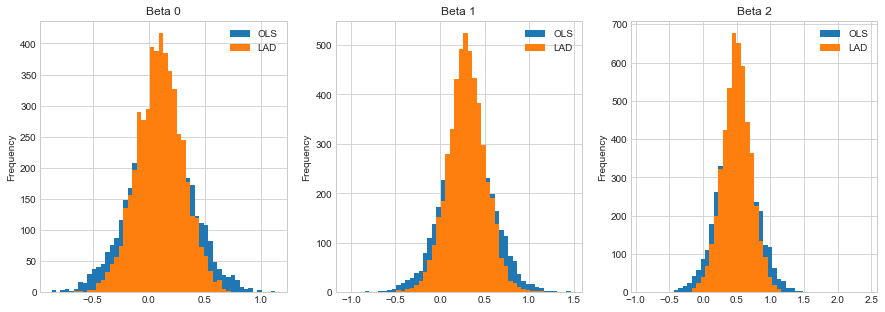

In [11]:

df_b0_hist = pd.DataFrame({'OLS':b0_OLS,'LAD':b0_LAD})
df_b1_hist = pd.DataFrame({'OLS':b1_OLS,'LAD':b1_LAD})
df_b2_hist = pd.DataFrame({'OLS':b2_OLS,'LAD':b2_LAD})
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5))
df_b0_hist.plot(ax=axes[0],kind="hist", title="Beta 0",bins=50)
df_b1_hist.plot(ax=axes[1],kind="hist", title="Beta 1",bins=50)
df_b2_hist.plot(ax=axes[2],kind="hist", title="Beta 2",bins=50)
plt.show()



From the above three distributions of $\beta_0$,$\beta_1$ of $\beta_2$ we see that both the OLS & LAD is normal distrubited. We see that the LAD method implies less variance. Therfore the LAD method is our preferable choise of method, thus their estimated minimum values barrily differ. 

<h1> Problem 2 - Durable purchases

<h1> Problem 3 - Gradient descent

First we insert given information and code block from the exam description:

Let $\boldsymbol{x} = \left[\begin{array}{c}
x_1 \\
x_2\\
\end{array}\right]$ be a two-dimensional vector. Consider the following algorithm:

**Algorithm:** `gradient_descent()`

**Goal:** Minimize the function $f(\boldsymbol{x})$.

1. Choose a tolerance $\epsilon>0$, a scale factor $ \Theta > 0$, and a small number $\Delta > 0$
2. Guess on $\boldsymbol{x}_0$ and set $n=1$
3. Compute a numerical approximation of the jacobian for $f$ by

    $$
    \nabla f(\boldsymbol{x}_{n-1}) \approx \frac{1}{\Delta}\left[\begin{array}{c}
    f\left(\boldsymbol{x}_{n-1}+\left[\begin{array}{c}
    \Delta\\
    0
    \end{array}\right]\right)-f(\boldsymbol{x}_{n-1})\\
    f\left(\boldsymbol{x}_{n-1}+\left[\begin{array}{c}
    0\\
    \Delta
    \end{array}\right]\right)-f(\boldsymbol{x}_{n-1})
    \end{array}\right]
    $$

4. Stop if the maximum element in $|\nabla f(\boldsymbol{x}_{n-1})|$ is less than $\epsilon$
5. Set $\theta = \Theta$ 
6. Compute $f^{\theta}_{n} = f(\boldsymbol{x}_{n-1} - \theta \nabla f(\boldsymbol{x}_{n-1}))$
7. If $f^{\theta}_{n} < f(\boldsymbol{x}_{n-1})$ continue to step 9
8. Set $\theta = \frac{\theta}{2}$ and return to step 6     
9. Set $x_{n} = x_{n-1} - \theta \nabla f(\boldsymbol{x}_{n-1})$
10. Set $n = n + 1$ and return to step 3

Step 1 & 3: First we define **jacobian** (gradient) 

In [12]:
def _rosen(x1,x2):
    f = (1.0-x1)**2 + 2*(x2-x1**2)**2

x1 = sm.symbols('x_1')
x2 = sm.symbols('x_2')
f = (1.0-x1)**2 + 2*(x2-x1**2)**2

Df = sm.Matrix([sm.diff(f,i) for i in [x1,x2]])
Df

Matrix([
[-8*x_1*(-x_1**2 + x_2) + 2*x_1 - 2.0],
[                   -4*x_1**2 + 4*x_2]])

Step 2: Secondly we define our function and initial guess. We set x equal to x0 and set n = 1

Step 3: We set our indicator, while we don't have taken to many iterations

Step 3: We evaluate gradient

Step 4: Compute our next step

Step 5: We check for convergence

Step 10: Update N and start all over again.

In [13]:
def rosen(x):
    return _rosen(x[0],x[1])
def rosen_jac(x):
    return np.array([-(2.0-2*x[0])-8*x[0]*(x[1]-x[0]**2),4*(x[1]-x[0]**2)])

def gradient_descent(f,x0,epsilon=1e-6,Theta=0.1,Delta=1e-8,max_iter=10_000):

    """ minimize function with gradient descent
        
    Args:

        f (callable): function
        x0 (np.ndarray): initial values
        jac (callable): jacobian - MADE MYSELF IN FUNCTION
        alpha (list): potential step sizes - CHANGED TO Theta
        max_iter (int): maximum number of iterations
        tol (float): tolerance
        
    Returns:
    
        x (np.ndarray): minimum
        n (int): number of iterations used
        
    """
    
    # step 2: initialize
    x = x0
    fx = f(x0)
    n = 1
    
    # step 2-6: iteration

    # Step 4: Iteration
    while n < max_iter:
            
        x_prev = x
        fx_prev = fx
        
        # step 2: evaluate gradient
        jacx = rosen_jac(x)
        
        # step 3: find good step size (line search)
        fx_ast = np.inf
        theta_ast = Theta
        theta = Theta / 2
        x = x_prev - theta*jacx
        fx = f(x)
        if fx < fx_ast:
            fx_ast = fx
            theta_ast = theta
        
        # step 4: update guess
        x = x_prev - theta_ast*jacx
                            
        # step 5: check convergence
        fx = f(x)
        if abs(fx-fx_prev) < Delta:
            break
            
        # Step 10
        n += 1
        
    return x,n
    pass

**Test case:**

In [14]:
def rosen(x):
    return (1.0-x[0])**2+2*(x[1]-x[0]**2)**2

x0 = np.array([1.1,1.1])
try:
    x,it = gradient_descent(rosen,x0)
    print(f'minimum found at ({x[0]:.4f},{x[1]:.4f}) after {it} iterations')
    assert np.allclose(x,[1,1])
except:
    print('not implemented yet')

minimum found at (1.0005,1.0011) after 255 iterations
not implemented yet


In [15]:
gradient_descent(rosen,x0)

(array([1.00049198, 1.00108441]), 255)